In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder as le , OneHotEncoder as ohe
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
pickle_off = open("used_car_sale_price_train_test.pickle","rb")
scaler = pickle.load(pickle_off)
model = pickle.load(pickle_off)
X_ohe = pickle.load(pickle_off)
cat_val = pickle.load(pickle_off)




In [20]:
def fn_predict_used_car_price(input_row=[]):
    ''' pass the data in following format
    val_data_row = [{'cost': 4751, 'lot_time':126 , 'is_over_age': 'YES', 'mileage':77606, 'vehicle_type': 'ECONOMY',\
       'is_domestic': 'Domestic', 'vehicle_age':5 , 'age_group': 'FIVE', 'color': 'BLUE', 'make': 'CHEVROLET', 'state': 'FL',\
       'make_model': 'CHEVROLET.CAVALIER'}]'''
    val_data_row = input_row
    df_val_data_row =pd.DataFrame(val_data_row)
    df_val_data_row.head()

    X_val = df_val_data_row.drop(['cost'],axis=1)  
    y_val = df_val_data_row['cost']

    X_val_ohe = X_ohe.transform(X_val[cat_val])
    X_val_final = pd.concat([X_val.drop(cat_val, 1),X_val_ohe], axis=1).reindex()
    X_val_final.head()

    # transform the val dataset
    rescaledValX = scaler.transform(X_val_final)
    val_pred = model.predict(rescaledValX)
#     print(mean_squared_error(y_val, val_pred))
    MSE = mean_squared_error(y_val, val_pred)
    r2 = model.score(rescaledValX, y_val)

#     print(f"MSE: {MSE}, R2: {r2}")

    perc_accu=(1-((val_pred-y_val)/val_pred))*100
    print(f'Percentage Accuracy: {perc_accu}')
    pd.DataFrame(zip(rescaledValX, y_val,val_pred)).head(200)
#     print(f'one hot encoded features:{rescaledValX}')
    print(f'Actual Value (not from train or test set (separate data from val data):{y_val}')
    print(f'Predicted Value from Model:{val_pred}')
    sns.barplot(x=['actual','predicted'], y=[y_val,val_pred[0]])
    output=[]
    output.append(f'Percentage Accuracy: {perc_accu}')
    output.append(f'Actual Value (not from train or test set (separate data from val data):{y_val}')
    output.append(f'Predicted Value from Model:{val_pred}')
    return output
    

Percentage Accuracy: 0    98.69611
Name: cost, dtype: float64
Actual Value (not from train or test set (separate data from val data):0    4751
Name: cost, dtype: int64
Predicted Value from Model:[4813.76622526]


['Percentage Accuracy: 0    98.69611\nName: cost, dtype: float64',
 'Actual Value (not from train or test set (separate data from val data):0    4751\nName: cost, dtype: int64',
 'Predicted Value from Model:[4813.76622526]']

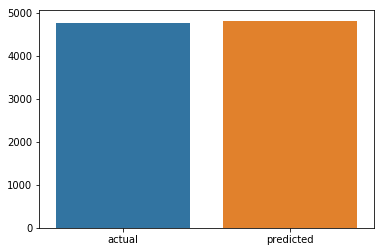

In [21]:
val_data_row = [{'cost': 4751, 'lot_time':126 , 'is_over_age': 'YES', 'mileage':77606, 'vehicle_type': 'ECONOMY',\
       'is_domestic': 'Domestic', 'vehicle_age':5 , 'age_group': 'FIVE', 'color': 'BLUE', 'make': 'CHEVROLET', 'state': 'FL',\
       'make_model': 'CHEVROLET.CAVALIER'}]
                
fn_predict_used_car_price(val_data_row)